In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
def findDensity(r, theta):
    P_theta = (1 + np.cos(theta))**(n + 1) + (1 - np.cos(theta))**(n + 1)
    S_theta = (4 * (n + 1) * np.sin(theta)**(2 * n))/(P_theta)**2
    rDensity = V_0**2 / (4 * np.pi * G * r**2)
    return rDensity * S_theta

def orbitalVel(m, r, G = 6.67e-11):
    return np.sqrt(G * m / r)

In [10]:
n = 1
G = 6.67e-11 # gravitational constant
r_0 = 5.2e+20 # radius of galaxy
rho_0 = (1/3) * 3e-28 # mean density measured over surface of sphere of rad r_0

r = np.linspace(0.1, r_0, 1000)
theta = np.linspace(0, np.pi, 1000)

V_0 = np.sqrt(4 * np.pi * G * rho_0 * r_0**2)

In [11]:
N = 10000
DMRadius = 1000000
DMBodies = np.zeros(shape = (N,3))
for i in range(N):
    DMBodies[i][0] = random.uniform(0,r_0) # set random radius values
    DMBodies[i][1] = random.uniform(0, np.pi) # set random theta values
    DMBodies[i][2] = random.uniform(0,2*np.pi) # set random phi values
density = findDensity(DMBodies[:,0], DMBodies[:,1])
masses = density * (4/3) * np.pi * DMRadius**2

In [12]:
testRadius = r_0/2
gravityContributors = np.where(DMBodies[:,0] < testRadius)[0]
gravitationalMass = masses[gravityContributors]
print(sum(gravitationalMass))

1.9558263880425904e-08


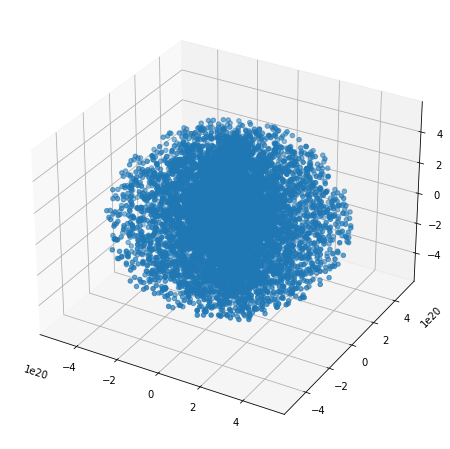

In [13]:
#%matplotlib widget
X = DMBodies[:,0] * np.sin(DMBodies[:,1]) * np.cos(DMBodies[:,2])
Y = DMBodies[:,0] * np.sin(DMBodies[:,1]) * np.sin(DMBodies[:,2])
Z = DMBodies[:,0] * np.cos(DMBodies[:,1])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z)
plt.show()

In [14]:
X = np.linspace(0.1,r_0,10000)
Y = np.linspace(0,np.pi,10000)
X, Y = np.meshgrid(X, Y)
Z = findDensity(X, Y)

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X, Y, Z)
plt.show()

KeyboardInterrupt: 

In [ ]:
theta = np.linspace(0,np.pi,1000)
r = np.linspace(0.1,1, 1000)
P_theta = (1 + np.cos(theta))**(n + 1) + (1 - np.cos(theta))**(n + 1)
S_theta = (4 * (n + 1) * np.sin(theta)**(2 * n))/(P_theta)**2
rDensity = V_0**2 / (4 * np.pi * G * r**2)

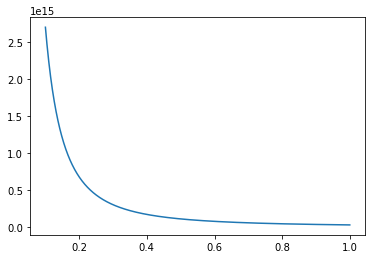

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(r, rDensity)
plt.show()

In [ ]:
# Matrix of all DM bodies: [radius, theta, phi, density, volume, mass]
N = 10000 # number of DM bodies
X = np.zeros(shape = (N + 1, 6)) # creates the matrix and fills with 0's

In [ ]:
rad = np.linspace(0.1,100,N + 1) # radii, from 0 to 100m
theta = np.linspace(0,np.pi,N + 1) #angle theta, from 0 to pi
phi = np.linspace(0,2*np.pi,N + 1) #angle phi, from 0 to 2pi

X[:,0] = rad
X[:,1] = theta
X[:,2] = phi

for i in range(N):
    X[i,3] = findDensity(X[i,0], X[i,1])
    X[i,4] = (X[i,1] * X[i,2] * (X[i + 1,0]**2 + X[i + 1,0]**2))/2 * (X[i + 1,0] - X[i,0])
    X[i,5] = X[i,3] * X[i,4]

print(X)

[[1.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.09990000e-01 3.14159265e-04 6.28318531e-04 1.10298616e+08
  2.83865717e-11 3.13099956e-03]
 [1.19980000e-01 6.28318531e-04 1.25663706e-03 3.70782158e+08
  1.33242097e-10 4.94037922e-02]
 ...
 [9.99800200e+01 3.14096434e+00 6.28192867e+00 5.33961696e+02
  1.97076444e+03 1.05231272e+06]
 [9.99900100e+01 3.14127849e+00 6.28255699e+00 1.33463725e+02
  1.97155259e+03 2.63130753e+05]
 [1.00000000e+02 3.14159265e+00 6.28318531e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


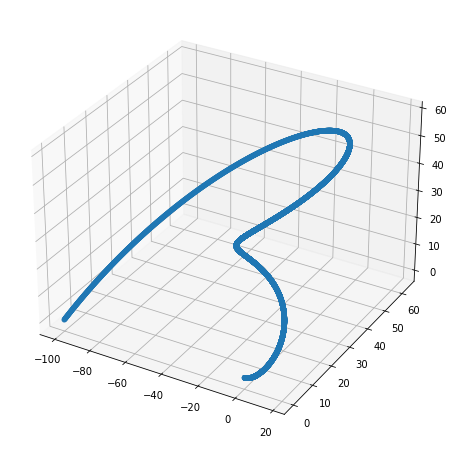

In [ ]:
xVals = X[:,0] * np.cos(X[:,1]) * np.cos(X[:,2])
yVals = X[:,0] * np.cos(X[:,1]) * np.sin(X[:,2])
zVals = X[:,0] * np.sin(X[:,1])
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xVals, yVals, zVals)
plt.show()

Try making the matrix with randomly plotted points, then mark out an area in space and figure out the amount of mass that should be present there. Use that to find the masses of the DM bodies.

X is not retaining negative values after conversion, need to make the plot in octants then applying a negative value when plotting.
this is only visual and does not affect calculations, I think

In [ ]:
N = 100
r_0 = 100
X = np.linspace(-r_0,r_0,100)
Y = np.linspace(-r_0,r_0,100)
Z = np.linspace(-r_0,r_0,100)
matrix = np.zeros(shape = (N,N,N,3))
DMBodies = np.zeros(shape = (N**3, 6))
DM_index = 0
for i in range(N):
    for j in range(N):
        for k in range(N):
            """ matrix[i,j,k,0] = X[k]
            matrix[i,j,k,1] = Y[j]
            matrix[i,j,k,2] = Z[i] """
            DMBodies[DM_index,0] = np.sqrt(X[k]**2 + Y[j]**2 + Z[i]**2) # calculating the radius in spherical
            DMBodies[DM_index,1] = np.arccos(Z[i]/DMBodies[DM_index,0]) # calculating theta in spherical
            DMBodies[DM_index,2] = np.arcsin(Y[j]/(DMBodies[DM_index,0] * np.sin(DMBodies[DM_index,1])))                 # calculation phi in spherical
            
            vol = (X[1] - X[0]) * (Y[1] - Y[0]) * (Z[1] - Z[0])
            DMBodies[DM_index,3] = findDensity(DMBodies[DM_index,0], DMBodies[DM_index,1]) # Density of DM body
            DMBodies[DM_index,4] = vol                                                  # Volume of DM body
            DMBodies[DM_index,5] = DMBodies[DM_index,3] * DMBodies[DM_index,4]          # Mass of DM body
            DM_index += 1

DMBodies


NameError: name 'n' is not defined

In [ ]:
randomRadii = [random.randint(1,r_0) for i in range(20)]
velocities = []

for i in range(len(randomRadii)):
    attractors = np.where(DMBodies[:,0] < randomRadii[i])[0]
    totalMass = 0
    for j in attractors:
        totalMass += DMBodies[j,5]
    
    velocity = orbitalVel(totalMass, randomRadii[i])
    velocities.append(velocity)

velocities

[147.06198924161836,
 149.28628474038894,
 148.8068209764146,
 143.39197780198685,
 149.55231537781802,
 139.4046394810646,
 148.867107841423,
 141.2756382643411,
 149.55231537781802,
 143.39197780198685,
 149.44371046548156,
 120.7240111522429,
 148.95757140133367,
 146.9089899420456,
 147.71475117048294,
 149.44371046548156,
 147.68998825362593,
 149.52275428585526,
 148.55745725230307,
 143.22755704669956]

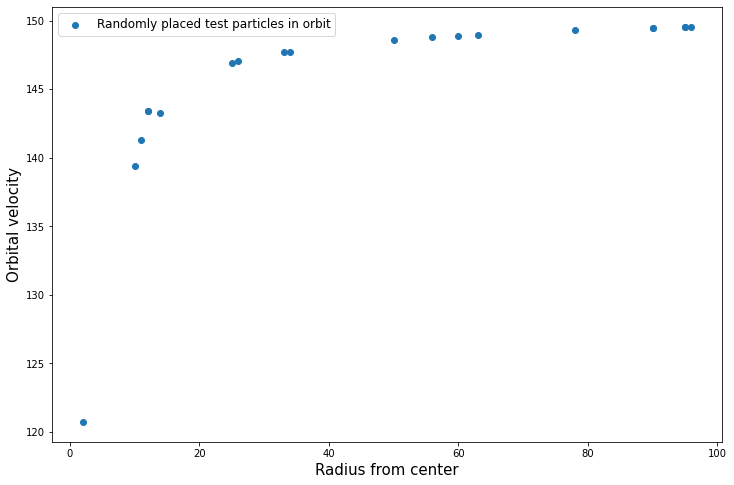

In [ ]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

ax.scatter(randomRadii, velocities, label = 'Randomly placed test particles in orbit')
ax.set_xlabel('Radius from center', fontsize = 15)
ax.set_ylabel('Orbital velocity', fontsize = 15)
ax.legend(fontsize = 12)
plt.savefig('rotation_curve_model.pdf')
plt.show()

In [ ]:
x_sphere = DMBodies[:,0] * np.sin(DMBodies[:,1]) * np.cos(DMBodies[:,2])
y_sphere = DMBodies[:,0] * np.sin(DMBodies[:,1]) * np.sin(DMBodies[:,2])
z_sphere = DMBodies[:,0] * np.cos(DMBodies[:,1])

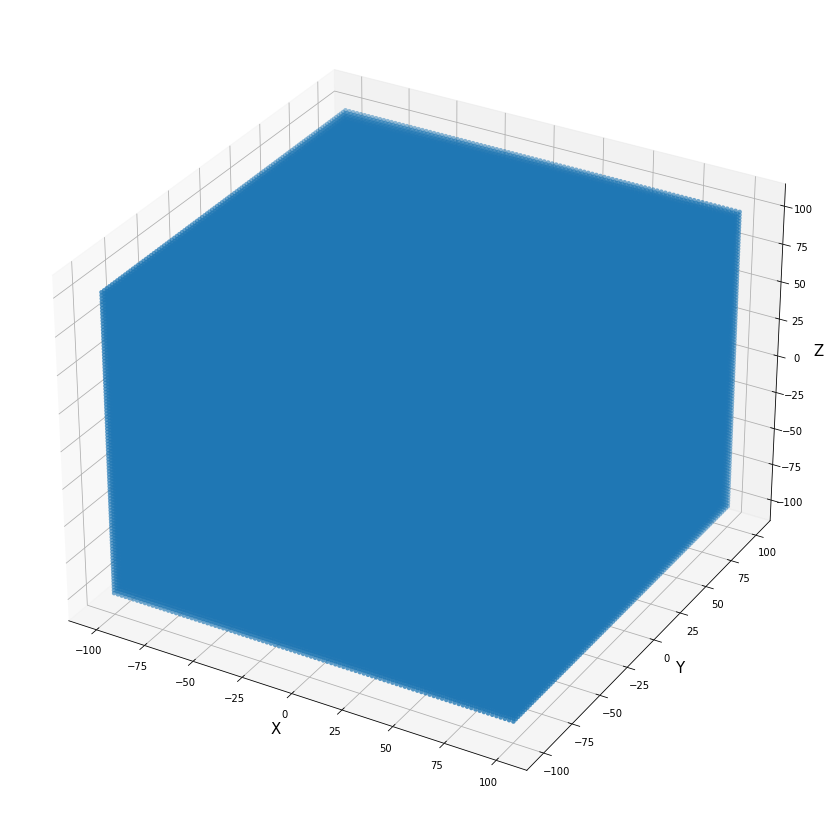

In [ ]:
X, Y, Z = np.meshgrid(X, Y, Z)
fig = plt.figure(figsize = (20,15))

""" ax1 = fig.add_subplot(121, projection = '3d')
ax1.scatter(matrix[:,:,:,0], matrix[:,:,:,1], matrix[:,:,:,2], linewidths = 0.01) """

ax2 = fig.add_subplot(111, projection = '3d')
ax2.scatter(X, Y, Z, linewidth = 0.001)
ax2.set_xlabel('X', fontsize = 15)
ax2.set_ylabel('Y', fontsize = 15)
ax2.set_zlabel('Z', fontsize = 15)
plt.savefig('C://Users/tyler/Documents/Alpha Folder/00-School/00-Lycoming/01-Active Classes/PHYS 448-A/Writing/Final Paper/Figures/cube.png')
plt.show()

In [ ]:
DMBodies = np.zeros(shape = (N**3, 6))

for i in range(len(DMBodies)):
    DMBodies[:,0] = np.sqrt(matrix[:,:,:,0]**2 + matrix[:,:,:,1]**2 + matrix[:,:,:,2]**2)

ValueError: could not broadcast input array from shape (100,100,100) into shape (1000000,)

In [ ]:
class DM_model():
    def __init__(self, N = None, n = 1, galactic_radius = 100, mean_density = (1/3) * 3e-28, G = 6.67e-11):
        self.radius = galactic_radius
        self.density = mean_density
        self.G = G
        self.N = N
        self.n = n

    def findDensity(self, r, theta):
        V_0 = np.sqrt(4 * np.pi * self.G * self.density * self.radius**2)
        P_theta = (1 + np.cos(theta))**(self.n + 1) + (1 - np.cos(theta))**(self.n + 1)
        S_theta = (4 * (self.n + 1) * np.sin(theta)**(2 * self.n))/(P_theta)**2
        rDensity = V_0**2 / (4 * np.pi * self.G * r**2)
        return rDensity * S_theta

    def orbitalVel(self, m, r):
        return np.sqrt(self.G * m / r)
    
    def make_matrix(self):
        X = np.linspace(-self.radius, self.radius, self.N)
        Y = np.linspace(-self.radius, self.radius, self.N)
        Z = np.linspace(-self.radius, self.radius, self.N)

        DMBodies = np.zeros(shape = (self.N**3, 6))
        DM_index = 0
        for i in range(self.N):
            for j in range(self.N):
                for k in range(self.N):
                    """ matrix[i,j,k,0] = X[k]
                    matrix[i,j,k,1] = Y[j]
                    matrix[i,j,k,2] = Z[i] """
                    DMBodies[DM_index,0] = np.sqrt(X[k]**2 + Y[j]**2 + Z[i]**2) # calculating the radius in spherical
                    DMBodies[DM_index,1] = np.arccos(Z[i]/DMBodies[DM_index,0]) # calculating theta in spherical
                    DMBodies[DM_index,2] = np.arcsin(Y[j]/(DMBodies[DM_index,0] * np.sin(DMBodies[DM_index,1])))                 # calculation phi in spherical
                    
                    vol = (X[1] - X[0]) * (Y[1] - Y[0]) * (Z[1] - Z[0])
                    DMBodies[DM_index,3] = self.findDensity(DMBodies[DM_index,0], DMBodies[DM_index,1]) # Density of DM body
                    DMBodies[DM_index,4] = vol                                                  # Volume of DM body
                    DMBodies[DM_index,5] = DMBodies[DM_index,3] * DMBodies[DM_index,4]          # Mass of DM body
                    DM_index += 1
        self.X = DMBodies
        return self.X

    def get_rotation_curve(self, num_particles = None):
        randomRadii = [random.randint(1,self.radius) for i in range(num_particles)]
        velocities = []

        for i in range(len(randomRadii)):
            attractors = np.where(self.X[:,0] < randomRadii[i])[0]
            totalMass = 0
            for j in attractors:
                totalMass += self.X[j,5]
            
            velocity = orbitalVel(totalMass, randomRadii[i])
            velocities.append(velocity)
        
        rot_curve = plt.figure(figsize = (12,8))
        ax = rot_curve.add_subplot(111)

        ax.scatter(randomRadii, velocities)
        return [randomRadii, velocities]

In [ ]:
model = DM_model(N = 100)
model.make_matrix()

array([[ 1.73205081e+02,  2.18627604e+00, -7.85398163e-01,
         2.50000000e-29,  8.24488122e+00,  2.06122030e-28],
       [ 1.72046624e+02,  2.19104532e+00, -7.95601891e-01,
         2.49974498e-29,  8.24488122e+00,  2.06101004e-28],
       [ 1.70904196e+02,  2.19582823e+00, -8.06013799e-01,
         2.49898055e-29,  8.24488122e+00,  2.06037978e-28],
       ...,
       [ 1.70904196e+02,  9.45764426e-01,  8.06013799e-01,
         2.49898055e-29,  8.24488122e+00,  2.06037978e-28],
       [ 1.72046624e+02,  9.50547333e-01,  7.95601891e-01,
         2.49974498e-29,  8.24488122e+00,  2.06101004e-28],
       [ 1.73205081e+02,  9.55316618e-01,  7.85398163e-01,
         2.50000000e-29,  8.24488122e+00,  2.06122030e-28]])

[[91, 86, 52, 35, 97, 4, 77, 10, 68, 78],
 [2.875248947840121e-17,
  2.872900493415532e-17,
  2.857323898657607e-17,
  2.8416011647339086e-17,
  2.876139583778347e-17,
  2.407724195681294e-17,
  2.871436170287169e-17,
  2.6808584515589312e-17,
  2.868296533016517e-17,
  2.87089009116142e-17]]

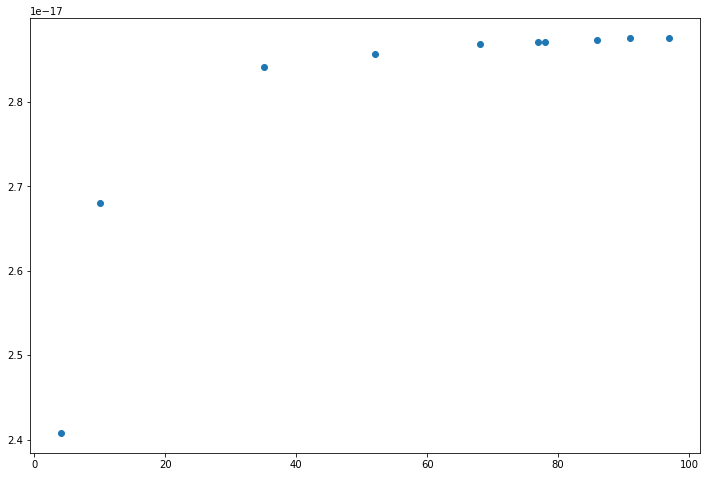

In [ ]:
model.get_rotation_curve(num_particles=10)

***
## Proof of concept
### Randomly scattered DM particles

split up galaxy into regions,
starting with 4 regions to test

In [ ]:
# region 1: (0 < r < r_0), (0 < theta < pi), (0 < phi < pi/2)
# region 2: (0 < r < r_0), (0 < theta < pi), (pi/2 < phi < pi)
# region 3: (0 < r < r_0), (0 < theta < pi), (pi < phi < 3pi/2)
# region 4: (0 < r < r_0), (0 < theta < pi), (3pi/2 < phi < 2pi)

In [ ]:
def integrator()